**Note: the EDA can be started after EDA subheading. The rest is just preprocessing ...** 

In [124]:
import climatedata_functions as climf

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime


import warnings; warnings.simplefilter("ignore")


In [ ]:
#read csv
metadata = pd.read_csv("../data/metadata_temp_12_01_06_complete.csv")
train_labels = pd.read_csv("../data/train_labels.csv")
#meta_complete = train_labels.merge(
#    metadata, how="left", left_on="uid", right_on="uid", validate="1:1")

In [ ]:
meta_complete.head(1)


Temperature data is partially in string (not downloaded at once) or in list. We want to have it in lists - so we first transform it into strings to then male it a list again. This might not be nesccesary for data downloaded at once in the future ...

In [ ]:
warnings.simplefilter(action='ignore')
for i in range(len(metadata.temp_01)):
    metadata.temp_01[i] = str(metadata.temp_01[i])
for i in range(len(metadata.temp_01)):
    metadata.temp_06[i] = str(metadata.temp_06[i])
for i in range(len(metadata.temp_01)):
    metadata.temp_12[i] = str(metadata.temp_12[i])

In [ ]:
warnings.simplefilter(action='ignore')

for i in range(len(metadata.temp_01)):
    metadata.temp_01[i] = metadata.temp_01[i][1:-1]

for i in range(len(metadata.temp_06)):
    metadata.temp_06[i] = metadata.temp_06[i][1:-1]

for i in range(len(metadata.temp_12)):
    metadata.temp_12[i] = metadata.temp_12[i][1:-1]

In [ ]:
list_temp = []
for x in (string.split(",")):
    x = replace_nan(x)
    list_temp.append(x)
print(list_temp)


There is an error message so --> we'll look for the error:

In [ ]:
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_01[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)
#print(metadata.temp_01[382])#272,382

It seems as there is an error in the columns -->on positipn 272 there is just an 'a' instead of a list of nans or floats#

Check if something is wrong with the files

### temp_01

In [ ]:
from datetime import timedelta
import warnings
warnings.simplefilter(action='ignore')

temp_list = []
hour = 1 #which our of the day
start_date = metadata.date[382]#272,382 were not right
date_index_list = metadata.index[metadata.date == start_date]
start_date = climf.get_start_date(start_date)
days = 7

temp_list = [[0] * days for i in range(len(date_index_list))]#make list of lists to store the values inside
for x in range(days):
    count = 0
    day_date = start_date - timedelta(days=x)
    ds, stop = climf.get_ds_aws(day_date, hour)#getting the temperature array for the specified date
    for index in date_index_list:
        x_grid = metadata.x_grid[index]
        y_grid = metadata.y_grid[index]
        if stop == True:
            temp_list[count][x] = np.nan
        else:
            temp_list[count][x] = ds[x_grid][y_grid]
        count += 1
        if x == days-1 and index == date_index_list[len(date_index_list)-1]:#if condition is met put the values in the metadata file
            for i in range(len(temp_list)):                    
                metadata.temp_01.loc[date_index_list[i]] = temp_list[i] #not index but  
    else:
        continue 

for i in date_index_list:
    metadata.temp_01[i] = str(metadata.temp_01[i])
for i in date_index_list:
    metadata.temp_01[i] = metadata.temp_01[i][1:-1]

In [ ]:
print(metadata.temp_01[date_index_list])
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_01[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

Now it works, check 06 and 12 also

### temp_06

In [ ]:
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_06[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

Looks good, no error message

### temp_12

In [ ]:
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_12[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

In [ ]:
from datetime import timedelta
import warnings
warnings.simplefilter(action='ignore')

temp_list = []
hour = 12 #which our of the day
start_date = metadata.date[4009]#776, 4009
date_index_list = metadata.index[metadata.date == start_date]
start_date = climf.get_start_date(start_date)
days = 7

temp_list = [[0] * days for i in range(len(date_index_list))]#make list of lists to store the values inside
for x in range(days):
    count = 0
    day_date = start_date - timedelta(days=x)
    ds, stop = climf.get_ds_aws(day_date, hour)#getting the temperature array for the specified date
    for index in date_index_list:
        x_grid = metadata.x_grid[index]
        y_grid = metadata.y_grid[index]
        if stop == True:
            temp_list[count][x] = np.nan
        else:
            temp_list[count][x] = ds[x_grid][y_grid]
        count += 1
        if x == days-1 and index == date_index_list[len(date_index_list)-1]:#if condition is met put the values in the metadata file
            for i in range(len(temp_list)):                    
                metadata.temp_12.loc[date_index_list[i]] = temp_list[i] #not index but  
    else:
        continue 

for i in date_index_list:
    metadata.temp_12[i] = str(metadata.temp_12[i])
for i in date_index_list:
    metadata.temp_12[i] = metadata.temp_12[i][1:-1]

In [ ]:
print(metadata.temp_12[date_index_list])
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_12[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

In [ ]:
metadata.to_csv("../data/metadata_temp_12_01_06_complete_without_a.csv")


In temp_06 there was no error message - it seems like it always put an a, when the download loop had to be started again. (temp_06 was downloaded without Unterbrechungen).

Note if the download works without breaks, the output will be in a list. The whole procedure from above may be unnecessary then.

Looks good, too. Continuing with the EDA, save file and continue with EDA

## EDA

In [170]:
metadata = pd.read_csv("../data/metadata_temp_12_01_06_complete_without_a.csv")


In [171]:
metadata['date'] = pd.to_datetime(metadata.date, format='%Y-%m-%d')

In [272]:
# what seasons are the data points from?
metadata["season"] = (
    metadata['date'].dt.month.replace([12, 1, 2], "winter")
    .replace([3, 4, 5], "spring")
    .replace([6, 7, 8], "summer")
    .replace([9, 10, 11], "fall"))

In [174]:
def replace_nan(x):
    if x=="nan":
        return np.nan
    else :
        return float(x)

def convert_str_to_list(data, features):
    for feature in features : 
        data[feature]=data[feature].apply(lambda x: [ replace_nan(X) for X in x.split(",")])
    return data
    

In [175]:
features = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1']
metadata.drop(features, axis=1, inplace=True)
metadata.head(1)


,uid,latitude,longitude,date,split,longitude_trans,x_grid,y_grid,temp_01,temp_12,temp_06,season
0,aabm,39.080319,-86.430867,2018-05-14,train,273.569133,570,1217,"287.3599, 287.36548, 287.3154, 287.20593, 287....","287.3912, 287.32434, 287.29132, 287.193, 287.0...","287.36844, 287.32245, 287.33054, 287.1744, 287...",spring
1,aabn,36.559700,-121.510000,2016-08-31,test,238.490000,550,192,"296.57178, 293.3236, 291.91608, 292.43445, nan...","286.90393, 286.4996, 287.33185, 287.949, 288.6...","290.52673, 289.31335, 286.42764, 286.5656, nan...",summer


In [176]:
features = ['temp_01', 'temp_06', 'temp_12']
convert_str_to_list(metadata, features)
metadata.head(1)

,uid,latitude,longitude,date,split,longitude_trans,x_grid,y_grid,temp_01,temp_12,temp_06,season
0,aabm,39.080319,-86.430867,2018-05-14,train,273.569133,570,1217,"[287.3599, 287.36548, 287.3154, 287.20593, 287...","[287.3912, 287.32434, 287.29132, 287.193, 287....","[287.36844, 287.32245, 287.33054, 287.1744, 28...",spring


In [177]:
features = ['temp_01', 'temp_06', 'temp_12']
for feat in features:
    metadata[str(feat + '_mean')] = ''
metadata.head(1)

,uid,latitude,longitude,date,split,longitude_trans,x_grid,y_grid,temp_01,temp_12,temp_06,season,temp_01_mean,temp_06_mean,temp_12_mean
0,aabm,39.080319,-86.430867,2018-05-14,train,273.569133,570,1217,"[287.3599, 287.36548, 287.3154, 287.20593, 287...","[287.3912, 287.32434, 287.29132, 287.193, 287....","[287.36844, 287.32245, 287.33054, 287.1744, 28...",spring,,,


In [178]:
#compute means of the 7 values in the list (nans are ignored here)
features = ['temp_01', 'temp_06', 'temp_12']
for feat in features:
    for i in metadata.index:
        metadata[str(feat + '_mean')][i] = np.nanmean(metadata[feat][i])-273.15

### Merge train labels and metadata

In [181]:
train_labels = pd.read_csv("../data/train_labels.csv")
meta_complete = train_labels.merge(
    metadata, how="left", left_on="uid", right_on="uid", validate="1:1")

In [182]:
meta_complete.info()###there are a lot of missing vlues for temperature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17060 entries, 0 to 17059
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   uid              17060 non-null  object        
 1   region           17060 non-null  object        
 2   severity         17060 non-null  int64         
 3   density          17060 non-null  float64       
 4   latitude         17060 non-null  float64       
 5   longitude        17060 non-null  float64       
 6   date             17060 non-null  datetime64[ns]
 7   split            17060 non-null  object        
 8   longitude_trans  17060 non-null  float64       
 9   x_grid           17060 non-null  int64         
 10  y_grid           17060 non-null  int64         
 11  temp_01          17060 non-null  object        
 12  temp_12          17060 non-null  object        
 13  temp_06          17060 non-null  object        
 14  season           17060 non-null  objec

[Text(0.5, 1.0, 'Cyanobacteria density per season and region')]

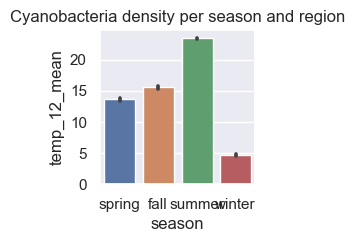

In [280]:
#plot noon temperature of the seasons
sns.set(rc={'figure.figsize':(2,2)})
sns.barplot(y=meta_complete.temp_12_mean, x=meta_complete.season).set(title='Cyanobacteria density per season and region')

[Text(0.5, 1.0, 'Cyanobacteria density per season and region')]

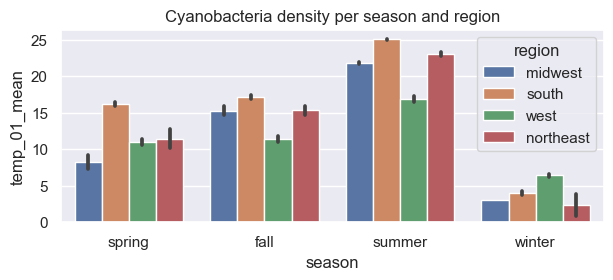

In [284]:
#Plot the temperature per season and region
sns.set(rc={'figure.figsize':(7,2.5)})
sns.barplot(y=meta_complete.temp_01_mean, x=meta_complete.season, hue=meta_complete.region).set(title='Cyanobacteria density per season and region')

In [273]:
###a lot of missing values in the temperature data --> drop these
meta_complete.dropna(inplace=True)

In [204]:
#compute difference between day (12:00) and night/early morening (06:00) temperature
#how much temp fluctuations
meta_complete['diff_temp_12_06'] = ''
for ind in meta_complete.index:
    meta_complete['diff_temp_12_06'][ind]  = np.array(meta_complete.temp_12[ind])-np.array(meta_complete.temp_06[ind])

### Correlation 
Is temperature and cyanobacteria density related?

Text(0.5, 0, 'mean temperature at 12:00 (7 days prior sampling)')

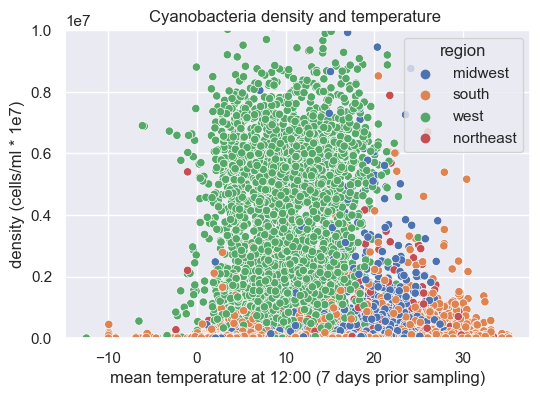

In [271]:
sns.set(rc={'figure.figsize':(6,4)})
sns.scatterplot(x=meta_complete.temp_12_mean, y=meta_complete.density,  hue=meta_complete.region)
plt.ylim(0, 1e7)
plt.title("Cyanobacteria density and temperature ")
plt.ylabel("density (cells/ml * 1e7)")
plt.xlabel("mean temperature at 12:00 (7 days prior sampling)")

There is not so much of a correlation here (on the first sight) but a regional trend. 
Let's plot the regions seperately:

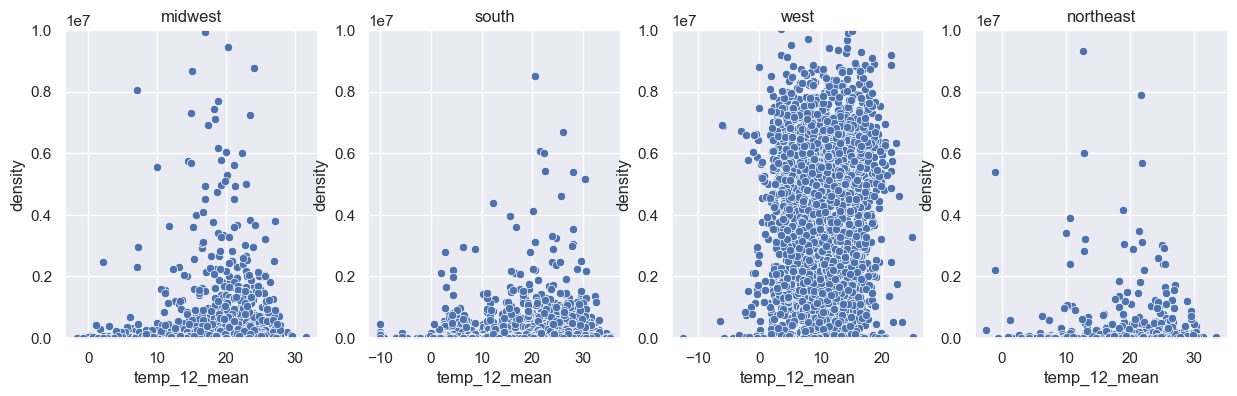

In [275]:
regions = ['midwest', 'south', 'west', 'northeast']
fig,ax = plt.subplots(1, 4,figsize=(15,4))

for i, region in enumerate(regions):
    sns.scatterplot(ax=ax[int(i)], x=meta_complete.temp_12_mean[meta_complete.region == region], y=meta_complete.density[meta_complete.region == region])
    ax[i].set_title(region)
    ax[i].set_ylim(0,1e7)

#


Do the temperature fluctuations are associated with cyanobacteria density?

Text(0.5, 0, 'temperature 12:00 - temperature 06:00 (°C)')

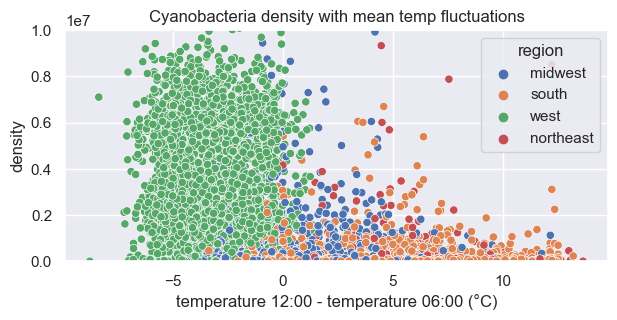

In [253]:
#compute dayli fluxtuations in the list
meta_complete['diff_temp_12_06'] = ''
for ind in meta_complete.index:
    meta_complete['diff_temp_12_06'][ind]  = np.array(meta_complete.temp_12[ind])-np.array(meta_complete.temp_06[ind])

#make the mean of the fluctuatons from the 7 last days
features = ['diff_temp_12_06']
meta_complete[str('diff_temp_12_06' + '_mean')] = ''
for i in meta_complete.index:
    meta_complete['diff_temp_12_06_mean'][i] = np.nanmean(meta_complete['diff_temp_12_06'][i])

#plot it
sns.set(rc={'figure.figsize':(7,3)})
sns.scatterplot(x=meta_complete.diff_temp_12_06_mean , y=meta_complete.density,  hue=meta_complete.region)
plt.ylim(0, 1e7)
plt.title("Cyanobacteria density with mean temp fluctuations")
plt.xlabel("temperature 12:00 - temperature 06:00 (°C)")

In [249]:
meta_complete['diff_temp_12_01'] = ''
for ind in meta_complete.index:
    meta_complete['diff_temp_12_01'][ind]  = np.array(meta_complete.temp_12[ind])-np.array(meta_complete.temp_01[ind])

features = ['diff_temp_12_01']
meta_complete[str('diff_temp_12_01' + '_mean')] = ''
for i in meta_complete.index:
    meta_complete['diff_temp_12_01_mean'][i] = np.nanmean(meta_complete['diff_temp_12_01'][i])

Text(0.5, 0, 'temperature 12:00 - temperature 06:00 (°C)')

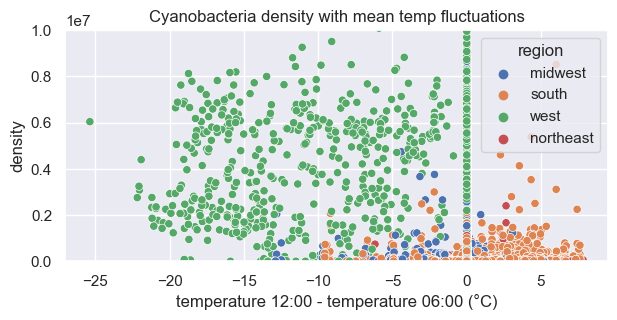

In [247]:
sns.set(rc={'figure.figsize':(7,3)})
sns.scatterplot(x=meta_complete.diff_temp_12_01_mean , y=meta_complete.density,  hue=meta_complete.region)
plt.ylim(0, 1e7)
plt.title("Cyanobacteria density with mean temp fluctuations")
plt.xlabel("temperature 12:00 - temperature 06:00 (°C)")

#here is a difference

In [244]:
corr= pearsonr(meta_complete.diff_temp_12_06_mean, meta_complete.density)
corr


PearsonRResult(statistic=-0.16057738214042144, pvalue=6.697719325180684e-86)

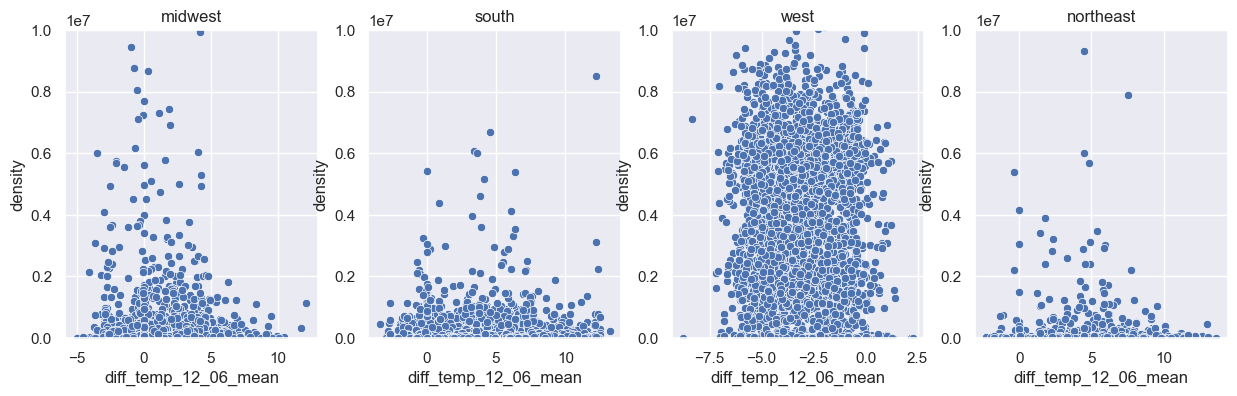

In [262]:
regions = ['midwest', 'south', 'west', 'northeast']
fig,ax = plt.subplots(1, 4,figsize=(15,4))

for i, region in enumerate(regions):
    sns.scatterplot(ax=ax[int(i)], x=meta_complete.diff_temp_12_06_mean[meta_complete.region == region], y=meta_complete.density[meta_complete.region == region])
    ax[i].set_title(region)
    ax[i].set_ylim(0,1e7)



In [223]:
meta_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14772 entries, 0 to 17059
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uid                   14772 non-null  object        
 1   region                14772 non-null  object        
 2   severity              14772 non-null  int64         
 3   density               14772 non-null  float64       
 4   latitude              14772 non-null  float64       
 5   longitude             14772 non-null  float64       
 6   date                  14772 non-null  datetime64[ns]
 7   split                 14772 non-null  object        
 8   longitude_trans       14772 non-null  float64       
 9   x_grid                14772 non-null  int64         
 10  y_grid                14772 non-null  int64         
 11  temp_01               14772 non-null  object        
 12  temp_12               14772 non-null  object        
 13  temp_06         

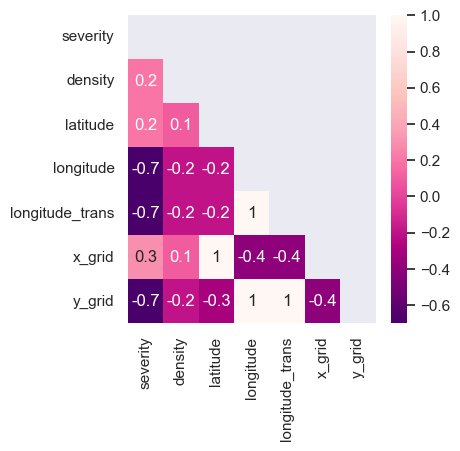

In [263]:
# Plot correlation matrix 
mask = np.triu(meta_complete.corr())
plt.figure(figsize = (4,4))
ax = sns.heatmap(round(meta_complete.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdPu_r')

In [224]:
from scipy.stats import pearsonr


In [241]:
for region in regions:
    corr, _ = pearsonr(meta_complete.temp_12_mean[meta_complete.region == region], meta_complete.density[meta_complete.region == region])
    print('region :', region, 'r = ',corr)


region : midwest r =  -0.03528262783119973
region : south r =  0.010871606755816152
region : west r =  0.04842169258865618
region : northeast r =  0.025692968023377408


In [237]:
corr.res

PearsonRResult(statistic=0.025692968023377408, pvalue=0.41446381957267225)